<div style="text-align: center; font-family: 'charter bt pro roman'; color: #2b2d42;">
    <h1>
    Replicando los Hechos Estilizados del Crecimiento Económico
    </h1>
</div>

<div style="text-align: center; font-family: 'charter bt pro roman'; color: #2b2d42;">
<h3>
Documentation
<br>
____________________
<br>
</h3>
</div>

<div style="font-family: PT Serif Pro Book; text-align: left; color: dark; font-size: 16px;">
    Este <i>notebook</i> contiene la documentación para la replicación de los Hechos Estilizados (HE) de <a href="https://link.springer.com/chapter/10.1007/978-1-349-08452-4_10" style="color: #2541b2">Kaldor (1963)</a> para el crecimiento económico. Estamos interesados en explorar la data para analizar las principales variables macro y los grandes ratios, y contrastar con capítulos como el de introducción de "Economic Growth" de Barro & Sala-i-Martin quienes hacen un tratamiento especial de estas cuestiones.
</div>

<div style="font-family: PT Serif Pro Book; text-align: left; color: dark; font-size: 16px;">
    <span style="font-size: 34px;">&#128452;</span> Consulte todo lo que necesita saber (documentación, proyectos, investigación, recursos, etc.) sobre <i>Penn World Tables (PWT)</i> <a href="https://www.rug.nl/ggdc/productivity/pwt/?lang=en" style="color: #2541b2">aquí</a>. Visite principalmente esta <a href="https://www.rug.nl/ggdc/docs/pwt100-user-guide-to-data-files.pdf" style="color: #2541b2">guía de usuario</a> y este <a href="https://www.rug.nl/ggdc/productivity/pwt/related-research-papers/the_next_generation_of_the_penn_world_table.pdf" style="color: #2541b2"><i>paper</i></a>.
</div>

<div style="text-align: center; font-family: 'PT Serif Pro Book'; color: #03256c; font-size: 16px;">
    Jason Cruz
    <br>
    <a href="mailto:jj.cruza@up.edu.pe" style="color: #03256c; font-size: 16px;">
        jj.cruza@up.edu.pe
    </a>
</div>

<div style="font-family: Amaya; text-align: left; color: #03256c; font-size:16px">El siguiente <b>outline es funcional</b>. Utilizando los botones proporcionados, los usuarios pueden mejorar su experiencia navegando por este <i>script</i>.<div/>

<div id="outilne">
   <!-- Contenido de la celda de destino -->
</div>

<div style="background-color: #2b2d42; padding: 10px; line-height: 1.5; font-family: 'PT Serif Pro Book';">
    <h2 style="text-align: left; color: #edf2f4;">
        Outline
    </h2>
    <br>
    <a href="#libraries" style="color: #06bee1; font-size: 18px; margin-left: 0px;">
        Libraries</a>
    <br>
    <a href="#setup" style="color: #06bee1; font-size: 18px; margin-left: 0px;">
        Initial set-up</a>
    <br>
    <a href="#1" style="color: #ffffff; font-size: 18px; margin-left: 0px;">
        1. Economic sector selector</a>
    <br>
    <a href="#2" style="color: #ffffff; font-size: 18px; margin-left: 0px;">
        2. Create horizon datasets</a>
    <br>
    <a href="#2.1." style="color: #94FFD8; font-size: 16px; margin-left: 20px;">
        2.1. Loading growth rate datasets from postgresql.</a>
    <br>
    <a href="#2.2." style="color: #94FFD8; font-size: 16px; margin-left: 20px;">
        2.2. Creating horizon dataset step by step.</a> 
    <br>
    <a href="#3" style="color: #ffffff; font-size: 18px; margin-left: 0px;">
        3. Create base year datasets</a>
    <br>
    <a href="#3.1." style="color: #94FFD8; font-size: 16px; margin-left: 20px;">
        3.1. Loading growth rate datasets from postgresql.</a>
    <br>
    <a href="#3.2." style="color: #94FFD8; font-size: 16px; margin-left: 20px;">
        3.2. Creating base year dataset.</a> 
    <br>
    <a href="#4" style="color: #ffffff; font-size: 18px; margin-left: 0px;">
        4. Remove observations affected by base year</a>
    <br>
    <a href="#5" style="color: #ffffff; font-size: 18px; margin-left: 0px;">
        5. Create growth rates by horizon dataset</a>
    <br>
    <a href="#6" style="color: #ffffff; font-size: 18px; margin-left: 0px;">
        6. Create vintages and releases datasets</a>
    <br>
    <a href="#7" style="color: #ffffff; font-size: 18px; margin-left: 0px;">
        7. Loading to SQL</a>
    <br>
</div>

<div style="text-align: left; font-family: 'PT Serif Pro Book'; color: dark; font-size:16px">
    Si tiene alguna pregunta o problema sobre el <i>coding</i>, envíe un correo electrónico a Jason Cruz <a href="mailto:jj.cruza@alum.up.edu.pe" style="color: rgb(0, 153, 123); text-decoration: none;"><span style="font-size: 24px;">&#x2709;</span>
    </a>.
    <div/>

<div style="text-align: left; font-family: 'PT Serif Pro Book'; color: dark; font-size:16px">
    Si no dispone de las librerías indicadas a continuación, utilice el siguiente código (como ejemplo) para instalar las librerías necesarias.
    <div/>

In [ ]:
#!pip install os # Comment this code with "#" if you have already installed this library.

<div id="libraries">
   <!-- Contenido de la celda de destino -->
</div>

<div style="text-align: left; font-family: 'PT Serif Pro Book'; color: dark;">
    <h2>
    Libraries
    </h2>
    <div/>

In [1]:
from urllib.request import urlopen # para acceder a sitios web (en especial, al sitio web de PWT).
from bs4 import BeautifulSoup # para web scraping.
import numpy as np # usual (arrays y matrices, funciones matemáticas).
import pandas as pd # usual (data frames).
import matplotlib.pyplot as plt # gráficos.
import matplotlib as mpl # estilo de gráficos.
get_ipython().run_line_magic('matplotlib', 'inline') # estilo de gráficos.
import seaborn as sns # estilo de gráficos.
sns.set() # "seteando" seaborn.
import os # para trabajos de rutas.

<div style="font-family: PT Serif Pro Book; text-align: left; color: dark; font-size: 16px;">
    <span style="font-size: 30px; color: #2541b2; font-weight: bold;">
        <a href="#outilne" style="color: #06bee1; text-decoration: none;">&#11180;</a>
    </span> 
    <a href="#outilne" style="color: #2541b2; text-decoration: none;">Retorne al outline.</a>
</div>

<div style="font-family: PT Serif Pro Book; text-align: left; color: dark; font-size: 16px;">
    Usted puede ver más sobre <i>web scraping</i> en esta interesante <a href="https://python-adv-web-apps.readthedocs.io/en/latest/scraping.html" style="color: #2541b2"> <i>documentación</i></a>.
</div>

<div id="setup">
   <!-- Contenido de la celda de destino -->
</div>

<div style="text-align: left; font-family: 'PT Serif Pro Book'; color: dark;">
    <h2>
    Initial set-up
    </h2>
    <div/>

<div style="text-align: left;">
    <span style="font-size: 24px; color: rgb(255, 32, 78); font-weight: bold;">&#9888;</span>
    <span style="font-family: PT Serif Pro Book; color: black; font-size: 16px;">
        Importe todas las funciones requeridas por este <i>script</i>.
    </span>
</div>

<div style="font-family: PT Serif Pro Book; text-align: left; color:dark; font-size:16px">Por favor, revise el <i>script</i> <code>economic_growth_he_functions.py</code>, el cual contiene todas las funciones requeridas por este <i>notebook</i>. Las funciones ahí están ordenadas de acuerdo a las <a href="#outilne" style="color: #3d30a2;">secciones</a> de este <i>script</i>.<div/>

In [2]:
# Import the function from the .py file
from economic_growth_he_functions import *

<div style="font-family: PT Serif Pro Book; text-align: left; color: dark; font-size: 16px;">
    Establezca su ruta base de trabajo
</div>

In [3]:
# Call the function to set the base path
set_base_path() # Una vez seleccionada su ruta, espere un par de segundos hasta que el código ejecute la orden

Ruta base establecida en: C:/Users/Jason Cruz/OneDrive/Documentos/Teaching Assistant/GitHub/up_macroeconomic_3/Python/pd_1


<div style="font-family: PT Serif Pro Book; text-align: left; color: dark; font-size: 16px;">
    Las siguientes 2 líneas crearan carpetas en su ruta actual, llámelas para exportar sus resultados.
</div>

In [34]:
in_folder = 'input' # folder para guardar data input provisional que se requiere en alguna parte del código
if not os.path.exists(in_folder):
    os.mkdir(in_folder)

out_folder = 'output' # folder para guardar resultados que produce el código
if not os.path.exists(out_folder):
    os.mkdir(out_folder)

In [5]:
# Carpeta para los gráficos
graphs_folder = 'output/graphs'
if not os.path.exists(graphs_folder):
    os.makedirs(graphs_folder)  # Crea la carpeta si no existe

# Carpeta para las tablas (datos exportados (.csv))
tables_folder = 'output/tables'
if not os.path.exists(tables_folder):
    os.makedirs(tables_folder)  # Crea la carpeta si no existe

<div style="font-family: PT Serif Pro Book; text-align: left; color:dark; font-size:16px">
    <span style="font-size: 24px; color: rgb(255, 32, 78); font-weight: bold;">&#9888;</span>
    Descargue el archivo <code>continents-according-to-our-world-in-data.csv</code> de <a href="https://ourworldindata.org/world-region-map-definitions" style="color: #2541b2">Definitions of world regions</a> de Our Worl in Data, y agréguelo en la ruta <code>input_data</code>.
<p>
De manera alternativa, puede agregar un código de <i>web scraping</i> para automatizar la importación de esta data sin tener que almacenarla localmente. Esto es más eficiente y este <i>script</i> ofrece un ejemplo claro que puede ser replicado para conseguirlo.
       </p>
    <div/>

<div style="font-family: PT Serif Pro Book; text-align: left; color: dark; font-size: 16px;">
    <span style="font-size: 30px; color: #2541b2; font-weight: bold;">
        <a href="#outilne" style="color: #06bee1; text-decoration: none;">&#11180;</a>
    </span> 
    <a href="#outilne" style="color: #2541b2; text-decoration: none;">Retorne al outline.</a>
</div>

<div id="1">
   <!-- Contenido de la celda de destino -->
</div>

<h1><span style = "color: #2541b2; font-family: PT Serif Pro Book; color: dark;">1.</span> <span style = "color: dark; font-family: PT Serif Pro Book;"><i>PWT Scraping</i></span></h1>

<div style="font-family: PT Serif Pro Book; text-align: left; color: dark; font-size: 16px;">
    Enlace de descarga del archivo excel de PWT.
</div>

In [6]:
pwt_excel_url = 'https://dataverse.nl/api/access/datafile/354095'

<div style="font-family: PT Serif Pro Book; text-align: left; color: dark; font-size: 16px;">
    Obtenemos la fuente HTML para ingresar la página de inicio de PWT.
</div>

In [7]:
html = urlopen("https://www.rug.nl/ggdc/productivity/pwt/?lang=en").read() # necesario para scrapear.

<div style="font-family: PT Serif Pro Book; text-align: left; color: dark; font-size: 16px;">
    Definimos el parsing del HTML.
</div>

In [8]:
soup = BeautifulSoup(html, 'html.parser')

<div style="font-family: PT Serif Pro Book; text-align: left; color: dark; font-size: 16px;">
    Probamos el scraping obteniendo el título de la página web de PWT.
</div>

In [9]:
title = soup.find('title').string 
title

'PWT 10.01 | Penn World Table | Groningen Growth and Development Centre | University of Groningen'

<div style="font-family: PT Serif Pro Book; text-align: left; color: dark; font-size: 16px;">
    Revisamos la versión disponible de PWT
</div>

In [10]:
# Cada vez que visite la página de PWT extraerá la última versión.
try:
    float(title.string.split(' ')[1])
    pwt_version = title.string.split(' ')[1]
    print('La versión actual es: ' + pwt_version)
except:
    print('Automatic PWT version identification failed.')

La versión actual es: 10.01


<div style="font-family: PT Serif Pro Book; text-align: left; color: dark; font-size: 16px;">
    <span style="font-size: 30px; color: #2541b2; font-weight: bold;">
        <a href="#outilne" style="color: #06bee1; text-decoration: none;">&#11180;</a>
    </span> 
    <a href="#outilne" style="color: #2541b2; text-decoration: none;">Retorne al outline.</a>
</div>

<div id="2">
   <!-- Contenido de la celda de destino -->
</div>

<h1><span style = "color: #2541b2; font-family: PT Serif Pro Book; color: dark;">2.</span> <span style = "color: dark; font-family: PT Serif Pro Book;">Limpieza de datos</span></h1>

<div id="2.1.">
   <!-- Contenido de la celda de destino -->
</div>

<h2><span style = "color: #2541b2; font-family: PT Serif Pro Book; color: #2541b2;">2.1.</span> <span style = "color: dark; font-family: PT Serif Pro Book;">Importamos la data</span></h2>

<div style="font-family: PT Serif Pro Book; text-align: left; color: dark; font-size: 16px;">
    Definimos el nombre del archivo (.xlsx) de datos de PWT en caso ya exista la data en su ruta local
</div>

In [11]:
# Definimos el mismo nombre que tendría el archivo original si uno descarga la data manualmente dese la página web
local_pwt_raw_data = 'pwt' + pwt_version.replace('.','') + '.xlsx' # En caso tenga la data (.xlsx) de PWT con un nombre diferente en su ruta actual, modifique aquí
print(f'El nombre del archivo xlsx local es: {local_pwt_raw_data}')

El nombre del archivo xlsx local es: pwt1001.xlsx


<div style="font-family: PT Serif Pro Book; text-align: left; color: dark; font-size: 16px;">
    Importamos la data de PWT desde su ruta actual en caso cuente con la data o la cargamos desde la web
</div>

In [12]:
# En caso ya exista la data en su ruta local, se importará la data localmente
if os.path.exists('../xslx/' + local_pwt_raw_data):
    info = pd.read_excel('../xslx/' + local_pwt_raw_data, sheet_name='Info', header=None)
    legend = pd.read_excel('../xslx/' + local_pwt_raw_data, sheet_name='Legend', index_col=0)
    pwt = pd.read_excel('../xslx/' + local_pwt_raw_data, sheet_name='Data', index_col=3, parse_dates=True)
# En caso NO exista la data en su ruta local, esta se cargará desde la página web de PWT
else:
    info = pd.read_excel(pwt_excel_url, sheet_name='Info', header=None) 
    legend = pd.read_excel(pwt_excel_url, sheet_name='Legend', index_col=0)
    pwt = pd.read_excel(pwt_excel_url, sheet_name='Data', index_col=3, parse_dates=True)

<div id="2.2.">
   <!-- Contenido de la celda de destino -->
</div>

<h2><span style = "color: #2541b2; font-family: PT Serif Pro Book; color: #2541b2;">2.2.</span> <span style = "color: dark; font-family: PT Serif Pro Book;">Generamos información clave de la data de PWT</span></h2>

<div style="font-family: PT Serif Pro Book; text-align: left; color: dark; font-size: 16px;">
    Generamos un archivo .csv con información relevante de PWT.
</div>

In [14]:
version = info.iloc[0][0].split(' ')[-1]
base_year = legend.loc['rgdpe']['Variable definition'].split(' ')[-1].split('US')[0] # año base para las variables en términos reales.
final_year = pwt[pwt['countrycode']=='USA'].sort_index().index[-1].year # último año con el que contamos en la data.

In [15]:
# Exportamos el archivo
metadata = pd.Series(dtype=str, name='Values')
metadata['version'] = version
metadata['base_year'] = base_year
metadata['final_year'] = final_year
metadata['gdp_per_capita_units'] = base_year + ' dollars per person'

metadata.to_csv(f"{tables_folder}/pwt_metadata.csv")

<div style="font-family: PT Serif Pro Book; text-align: left; color: dark; font-size: 16px;">
    Generamos un archivo .csv con la descripción de todas las variables de nuestra data PWT.
</div>

In [16]:
# Exportamos el DataFrame a un archivo CSV
legend.to_csv(f"{tables_folder}/pwt_vars_description.csv", sep=',')

<div id="2.3.">
   <!-- Contenido de la celda de destino -->
</div>

<h2><span style = "color: #2541b2; font-family: PT Serif Pro Book; color: #2541b2;">2.3.</span> <span style = "color: dark; font-family: PT Serif Pro Book;">Generamos las variables clave para los HE de Kaldor a partir de la data de PWT</span></h2>

<div style="font-family: PT Serif Pro Book; text-align: left; color: dark; font-size: 16px;">
    Reestablecemos el índice del dataframe como un ínidice jerárquico
</div>

In [17]:
pwt_df = pwt.copy() # Usamos una copia de la data en bruto para trabajar sobre la copia sin alterar la original
pwt_df = pwt_df.set_index(['country', pwt_df.index]) # útil para determinar las unidades id (país-año) y para la visualización de los HE.
pwt_df.head(5)

countrycode   currency_unit  rgdpe  rgdpo  pop  emp  avh  \
country year                                                                  
Aruba   1950-01-01         ABW  Aruban Guilder    NaN    NaN  NaN  NaN  NaN   
        1951-01-01         ABW  Aruban Guilder    NaN    NaN  NaN  NaN  NaN   
        1952-01-01         ABW  Aruban Guilder    NaN    NaN  NaN  NaN  NaN   
        1953-01-01         ABW  Aruban Guilder    NaN    NaN  NaN  NaN  NaN   
        1954-01-01         ABW  Aruban Guilder    NaN    NaN  NaN  NaN  NaN   

                    hc  ccon  cda  ...  csh_x  csh_m  csh_r  pl_c  pl_i  pl_g  \
country year                       ...                                          
Aruba   1950-01-01 NaN   NaN  NaN  ...    NaN    NaN    NaN   NaN   NaN   NaN   
        1951-01-01 NaN   NaN  NaN  ...    NaN    NaN    NaN   NaN   NaN   NaN   
        1952-01-01 NaN   NaN  NaN  ...    NaN    NaN    NaN   NaN   NaN   NaN   
        1953-01-01 NaN   NaN  NaN  ...    NaN    NaN    NaN   NaN   NaN   NaN   
        1954-01-01 NaN   NaN  NaN  ...    NaN    NaN    NaN   NaN   NaN   NaN   

                    pl_x  pl_m  pl_n  pl_k  
country year                                
Aruba   1950-01-01   NaN   NaN   NaN   NaN  
        1951-01-01   NaN   NaN   NaN   NaN  
        1952-01-01   NaN   NaN   NaN   NaN  
        1953-01-01   NaN   NaN   NaN   NaN  
        1954-01-01   NaN   NaN   NaN   NaN  

[5 rows x 50 columns]

<div style="font-family: PT Serif Pro Book; text-align: left; color: dark; font-size: 16px;">
    Describimos la data
</div>

In [18]:
pwt_df.describe()

,rgdpe,rgdpo,pop,emp,avh,hc,ccon,cda,cgdpe,cgdpo,...,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
count,1.039900e+04,1.039900e+04,10399.000000,9529.000000,3492.000000,8637.000000,1.039900e+04,1.039900e+04,1.039900e+04,1.039500e+04,...,10399.000000,10399.000000,10399.000000,10399.000000,10399.000000,10399.000000,10399.000000,10399.000000,10314.000000,7090.000000
mean,3.048523e+05,3.070802e+05,30.962982,14.171167,1986.923200,2.087200,2.249465e+05,3.049463e+05,3.061396e+05,3.061624e+05,...,0.229317,-0.300829,0.017791,0.370850,0.423964,0.345635,0.409820,0.403422,0.364398,1.417965
std,1.214332e+06,1.218457e+06,116.189454,58.056973,284.003338,0.727413,8.882343e+05,1.236095e+06,1.226056e+06,1.224439e+06,...,0.266793,0.640212,0.216200,0.424091,0.635708,0.408015,0.196283,0.202566,0.435907,2.078080
min,2.036377e+01,2.765232e+01,0.004425,0.001200,1380.607643,1.007038,1.604856e+01,2.176663e+01,2.026185e+01,1.693567e+01,...,-1.937363,-23.237627,-12.568965,0.015589,0.006002,0.009270,0.007354,0.020806,0.014431,0.067465
25%,6.801782e+03,7.191773e+03,1.579663,0.775101,1788.478805,1.450483,5.892980e+03,7.194495e+03,6.689781e+03,6.811935e+03,...,0.067027,-0.379584,-0.025204,0.171226,0.191958,0.116110,0.237652,0.240777,0.171785,0.691959
50%,3.031913e+04,3.084435e+04,6.150688,2.856044,1972.355973,1.987572,2.465417e+04,3.134864e+04,3.031841e+04,3.049679e+04,...,0.140116,-0.200254,0.000326,0.306258,0.377943,0.244554,0.443856,0.452949,0.300982,1.000000
75%,1.559740e+05,1.587386e+05,19.934229,8.266107,2168.035042,2.674011,1.133967e+05,1.532297e+05,1.559242e+05,1.559250e+05,...,0.300332,-0.102694,0.044529,0.484549,0.557087,0.452951,0.557034,0.541063,0.453684,1.511751
max,2.086051e+07,2.059584e+07,1433.783686,799.306641,3039.794005,4.351568,1.682624e+07,2.138355e+07,2.079136e+07,2.056603e+07,...,3.523480,32.874020,7.598285,23.122841,34.444988,18.420809,2.056070,4.990355,20.694918,34.340618


In [19]:
pwt_df.columns # Total de variables

Index(['countrycode', 'currency_unit', 'rgdpe', 'rgdpo', 'pop', 'emp', 'avh',
       'hc', 'ccon', 'cda', 'cgdpe', 'cgdpo', 'cn', 'ck', 'ctfp', 'cwtfp',
       'rgdpna', 'rconna', 'rdana', 'rnna', 'rkna', 'rtfpna', 'rwtfpna',
       'labsh', 'irr', 'delta', 'xr', 'pl_con', 'pl_da', 'pl_gdpo', 'i_cig',
       'i_xm', 'i_xr', 'i_outlier', 'i_irr', 'cor_exp', 'statcap', 'csh_c',
       'csh_i', 'csh_g', 'csh_x', 'csh_m', 'csh_r', 'pl_c', 'pl_i', 'pl_g',
       'pl_x', 'pl_m', 'pl_n', 'pl_k'],
      dtype='object')

<div style="text-align: left; font-family: 'PT Serif Pro Book'; color: dark; font-size:16px">
    <span style="font-size: 24px; color: #FFA823; font-weight: bold;">&#9888;</span>
    Revise <code>legend</code> para conocer la descripción de todas las variables de nuestra data PWT.
    <div/>

<div style="font-family: PT Serif Pro Book; text-align: left; color: dark; font-size: 16px;">
    Generamos las series de tiempo individuales
</div>

In [20]:
# Generamos todas las variables clave de los HE en términos per cápita y por trabajador
gdp_pc = create_data_set(pwt_df, year_0 = 1960, pwt_code ='rgdpe', per_capita = True, per_worker = False)
gdp_pw = create_data_set(pwt_df, year_0 = 1960, pwt_code ='rgdpe', per_capita = False, per_worker = True)
capital_pc = create_data_set(pwt_df, year_0 = 1960, pwt_code = 'cn', per_capita = True, per_worker = False)
capital_pw = create_data_set(pwt_df, year_0 = 1960, pwt_code = 'cn', per_capita = False, per_worker = True)
return_capital = create_data_set(pwt_df, year_0 = 1960, pwt_code = 'irr', per_capita = False, per_worker = False)
consumption_pc = create_data_set(pwt_df, year_0 = 1960, pwt_code = 'ccon', per_capita = True, per_worker = False)
labor_national_income = create_data_set(pwt_df, year_0 = 1960, pwt_code = 'labsh', per_capita = False, per_worker = False)

In [23]:
# Generamos una nueva variable para el ratio capital físico-producto
pwt_df['ratio_k_y'] = (pwt_df['cn']/pwt_df['rgdpe']) 

ratio_k_y_pc = create_data_set(pwt_df, year_0 = 1960, pwt_code = 'ratio_k_y', per_capita = True, per_worker = False)

# Generamos dos nuevas variables para las tasas de crecimiento
pwt_df['pbi_pc'] = (pwt_df['rgdpe']/pwt_df['pop'])
pwt_df['pbi_pw'] = (pwt_df['rgdpe']/pwt_df['emp'])

# Ajustamos pct_change para especificar fill_method=None
pwt_df['growth_rate_pbi_pc'] = pwt_df['pbi_pc'].pct_change(periods=1, fill_method=None) * 100 # tasa de crecimiento del PBI pc
pwt_df['growth_rate_pbi_pw'] = pwt_df['pbi_pw'].pct_change(periods=1, fill_method=None) * 100 # tasa de crecimiento del PBI pw

growth_rate_gdp_pc = create_data_set(pwt_df, year_0 = 1960, pwt_code = 'growth_rate_pbi_pc', per_capita = True, per_worker = False)
growth_rate_gdp_pw = create_data_set(pwt_df, year_0 = 1960, pwt_code = 'growth_rate_pbi_pw', per_capita = False, per_worker = True)

In [26]:
# Calculamos logaritmos de las variables 
pwt_df['log_pbi_pc'] = np.log2(pwt_df['pbi_pc'])
pwt_df['log_pbi_pw'] = np.log2(pwt_df['pbi_pw'])
log_gdp_pc = create_data_set(pwt_df, year_0 = 1960, pwt_code = 'log_pbi_pc', per_capita = False, per_worker = False)
log_gdp_pw = create_data_set(pwt_df, year_0 = 1960, pwt_code = 'log_pbi_pw', per_capita = False, per_worker = False)

<div style="font-family: PT Serif Pro Book; text-align: left; color: dark; font-size: 16px;">
    Intersectamos países con datos en 1960
</div>

<div style="font-family: PT Serif Pro Book; text-align: left; color: dark; font-size: 16px;">
    El propósito de encontrar esta intersección es asegurar que todos los dataframes estén alineados en términos de los países que contienen datos para el año 1960. Esto es importante para realizar análisis comparativos o combinados, ya que los dataframes deben tener las mismas columnas para una comparación válida.
</div>

In [27]:
# Encontramos la intersección de países con datos en 1960
intersection = gdp_pc.columns.intersection(gdp_pw.columns)\
.intersection(growth_rate_gdp_pc.columns).intersection(growth_rate_gdp_pw.columns)\
.intersection(log_gdp_pc.columns).intersection(log_gdp_pw.columns)\
.intersection(capital_pc.columns).intersection(capital_pw.columns)\
.intersection(return_capital.columns).intersection(consumption_pc.columns)\
.intersection(labor_national_income.columns).intersection(ratio_k_y_pc.columns)

# Ajustamos la data de acuerdo a la intersección anterior
gdp_pc = gdp_pc[intersection]
gdp_pw = gdp_pw[intersection]
growth_rate_gdp_pc = growth_rate_gdp_pc[intersection]
growth_rate_gdp_pw = growth_rate_gdp_pw[intersection]
log_gdp_pc = log_gdp_pc[intersection]
log_gdp_pw = log_gdp_pw[intersection]
capital_pc = capital_pc[intersection]
capital_pw = capital_pw[intersection]
return_capital = return_capital[intersection]
consumption_pc = consumption_pc[intersection]
labor_national_income = labor_national_income[intersection]
ratio_k_y_pc = ratio_k_y_pc[intersection]

# Exportamos a .csv
gdp_pc.to_csv(f"{tables_folder}/{'gdp_pc.csv'}")
gdp_pw.to_csv(f"{tables_folder}/{'gdp_pw.csv'}")
growth_rate_gdp_pc.to_csv(f"{tables_folder}/{'growth_rate_gdp_pc.csv'}")
growth_rate_gdp_pw.to_csv(f"{tables_folder}/{'growth_rate_gdp_pw.csv'}")
log_gdp_pc.to_csv(f"{tables_folder}/{'log_gdp_pc.csv'}")
log_gdp_pw.to_csv(f"{tables_folder}/{'log_gdp_pw.csv'}")
capital_pc.to_csv(f"{tables_folder}/{'capital_pc.csv'}")
capital_pw.to_csv(f"{tables_folder}/{'capital_pw.csv'}")
return_capital.to_csv(f"{tables_folder}/{'return_capital.csv'}")
consumption_pc.to_csv(f"{tables_folder}/{'consumption_pc.csv'}")
labor_national_income.to_csv(f"{tables_folder}/{'labor_national_income.csv'}")
ratio_k_y_pc.to_csv(f"{tables_folder}/{'ratio_k_y_pc.csv'}")

<div style="font-family: PT Serif Pro Book; text-align: left; color: dark; font-size: 16px;">
    <span style="font-size: 30px; color: #2541b2; font-weight: bold;">
        <a href="#outilne" style="color: #06bee1; text-decoration: none;">&#11180;</a>
    </span> 
    <a href="#outilne" style="color: #2541b2; text-decoration: none;">Retorne al outline.</a>
</div>

<div id="3">
   <!-- Contenido de la celda de destino -->
</div>

<h1><span style = "color: #2541b2; font-family: PT Serif Pro Book; color: dark;">3.</span> <span style = "color: dark; font-family: PT Serif Pro Book;">Visualización de datos</span></h1>

<div id="he">
   <!-- Contenido de la celda de destino -->
</div>

<div style="font-family: PT Serif Pro Book; text-align: left; color: #414a49; font-size: 16px;">
    <a href="#he-1" style="text-decoration: none; color: #2541b2"> <span style="font-size: 24px; color: #03256c;">&#10122;</span> La producción per cápita crece en el tiempo y su tasa de crecimiento no es decreciente.</a>
    <br>
    <a href="#he-2" style="text-decoration: none; color: #2541b2"><span style="font-size: 24px; color: #03256c">&#10123;</span> El capital físico por trabajador crece en el tiempo.</a>
    <br>
    <a href="#he-3" style="text-decoration: none; color: #2541b2"><span style="font-size: 24px; color: #03256c">&#10124;</span> La tasa de rentabilidad del capital es aproximadamente constante.</a>
    <br>
    <a href="#he-4" style="text-decoration: none; color: #2541b2"><span style="font-size: 24px; color: #03256c">&#10125;</span> El ratio capital físico entre producción es aproximadamente constante.</a>
    <br>
    <a href="#he-5" style="text-decoration: none; color: #2541b2"><span style="font-size: 24px; color: #03256c">&#10126;</span> Las participaciones del trabajo y capital físico en la renta nacional son aproximadamente constantes.
</a>
    <br>
    <a href="#he-6" style="text-decoration: none; color: #2541b2"><span style="font-size: 24px; color: #03256c">&#10127;</span> La tasa de crecimiento de la producción por trabajador es muy distinta en los distintos países.</a>
</div>

<div id="he-1">
   <!-- Contenido de la celda de destino -->
</div>

<div style="text-align: left; font-family: 'PT Serif Pro Book'; font-size:22px">
    <span style="font-size: 24px; color: #03256c">&#10122;</span> <span>La producción per cápita crece en el tiempo y su tasa de crecimiento no es decreciente.</span>
  </div>

<div style="font-family: Times New Roman; text-align: left; color:dark"> Producción per cápita. <div/>

In [28]:
df_gdp_pc = pd.read_csv(f"{tables_folder}/{'gdp_pc.csv'}", index_col = 'year', parse_dates = True)
df_gdp_pc.head(5)

,Argentina,Australia,Austria,Belgium,Bolivia (Plurinational State of),Brazil,Burkina Faso,Canada,Chile,China,...,Taiwan,Thailand,Trinidad and Tobago,Turkey,United Kingdom,United States,Uruguay,Venezuela (Bolivarian Republic of),Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
1960-01-01,3252.630494,15437.939216,10109.611369,11293.192122,1545.339433,2429.154769,900.586156,14980.657991,5466.905227,996.100554,...,2553.968123,1214.723473,7869.284796,5051.111940,12861.092670,18900.748300,7705.264011,7851.395244,2858.762323,2485.571112
1961-01-01,3353.949600,15473.133028,10639.052414,11737.216193,1595.443348,2660.471111,868.797918,15212.399258,5181.702597,857.225202,...,2698.279393,1258.717682,9048.024834,4998.647316,13104.363941,19068.181067,7713.958737,7718.622952,2713.067569,2547.953859
1962-01-01,3145.833725,16085.577383,10893.577429,12290.966809,1604.521699,2750.120053,931.350502,15865.701722,6272.529843,921.037750,...,2843.134545,1274.564667,8650.320971,5165.759933,13187.817970,19929.942623,7773.475157,7793.094139,2582.095370,2452.915675
1963-01-01,3073.951879,17126.591887,11316.709075,12612.764838,1671.224684,2847.978324,897.869032,16342.581170,6489.135027,1003.055040,...,3108.697375,1315.594008,9668.196741,5521.461220,13592.445679,20496.012847,7463.180888,8011.923465,2661.708147,2434.347994
1964-01-01,3232.069949,17551.088332,11799.938402,13416.457116,1766.829266,2912.684002,939.889586,17156.526784,6496.159825,1095.963175,...,3449.727818,1392.559547,9838.998520,5630.367014,14308.948818,21400.358562,7707.037661,8533.701579,3031.893674,2297.194039


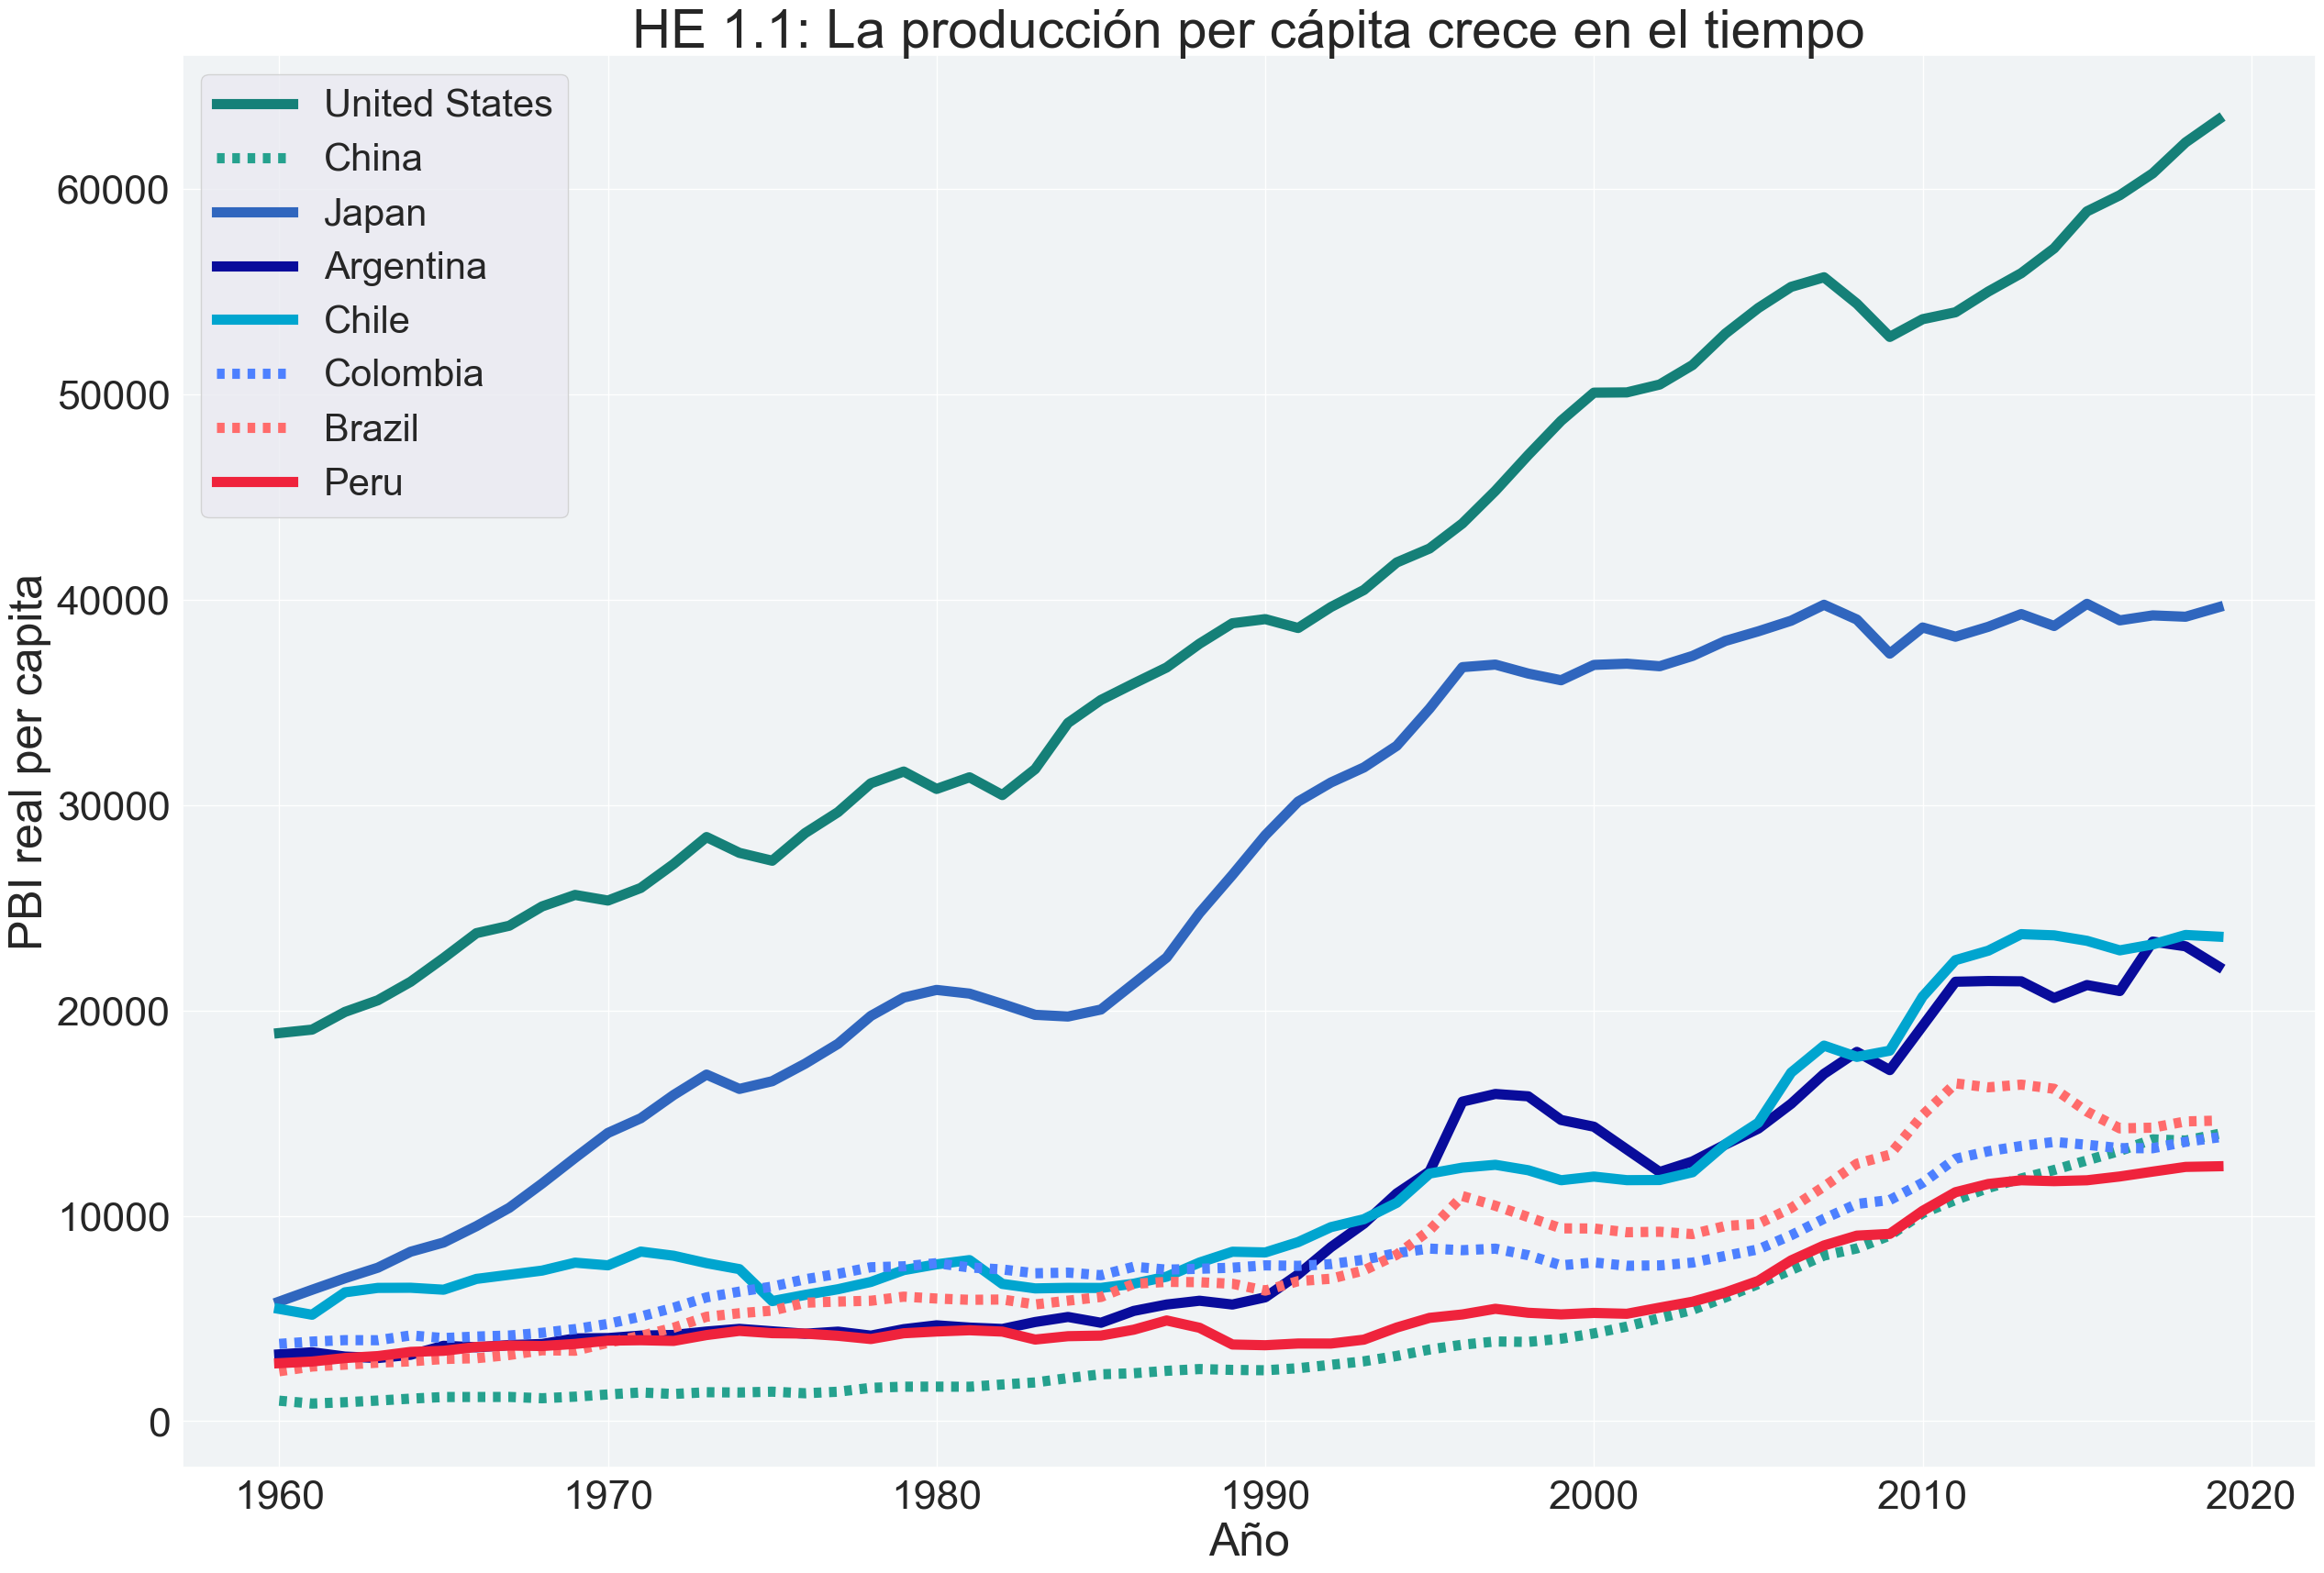

In [59]:
# Establecemos el tamaño de la figura
fig, ax = plt.subplots(figsize=(30,20))

# Cambiar el color de fondo del área del gráfico
ax.set_facecolor('#f0f3f5')

# Cambiar el color de fondo del área de la figura (opcional, si también quieres cambiarlo)
fig.patch.set_facecolor('white')

# Etiquetamos los ejes
ax.set_title('HE 1.1: La producción per cápita crece en el tiempo', fontsize = 42)
ax.set_xlabel('Año', fontsize = 36)
ax.set_ylabel('PBI real per capita', fontsize = 36)
ax.tick_params(axis = 'both', which = 'major', labelsize = 32)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)

# Ploteamos
with plt.style.context('classic'):
    plt.plot(df_gdp_pc['United States'], color="#158078", linewidth=8)  # Línea sólida
    plt.plot(df_gdp_pc['China'], color="#25a18e", linewidth=8, linestyle='--')  # Línea entrecortada
    plt.plot(df_gdp_pc['Japan'], color="#3066BE", linewidth=8)  # Línea sólida
    plt.plot(df_gdp_pc['Argentina'], color="#090C9B", linewidth=8)  # Línea sólida
    plt.plot(df_gdp_pc['Chile'], color="#00a5cf", linewidth=8)  # Línea sólida
    plt.plot(df_gdp_pc['Colombia'], color="#4d80ff", linewidth=8, linestyle='--')  # Línea entrecortada
    plt.plot(df_gdp_pc['Brazil'], color="#ff6b6b", linewidth=8, linestyle='--')  # Línea entrecortada
    plt.plot(df_gdp_pc['Peru'], color="#ef233c", linewidth=8)  # Línea sólida

# Leyenda
plt.legend(['United States', 'China', 'Japan', 'Argentina', 'Chile', 'Colombia', 'Brazil', 'Peru'], loc='upper left', fontsize="30")

# Guardar el gráfico en un archivo PDF
plt.savefig(f"{graphs_folder}/{'h1_1.png'}", dpi=300, bbox_inches='tight')

# Mostrar el gráfico
plt.show()

<div style="font-family: Times New Roman; text-align: left; color:dark"> Tasa de crecimiento de la producción per cápita. <div/>

In [60]:
df_growth_rate_gdp_pc = pd.read_csv(f"{tables_folder}/{'growth_rate_gdp_pc.csv'}", index_col = 'year', parse_dates = True)
df_growth_rate_gdp_pc.head(5)

,Argentina,Australia,Austria,Belgium,Bolivia (Plurinational State of),Brazil,Burkina Faso,Canada,Chile,China,...,Taiwan,Thailand,Trinidad and Tobago,Turkey,United Kingdom,United States,Uruguay,Venezuela (Bolivarian Republic of),Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
1960-01-01,0.291579,-0.096601,0.990788,0.681907,1.038460,0.095273,1.639672,0.051887,0.383285,-0.009023,...,0.403497,0.311662,1.552383,-0.101989,0.074295,0.005423,1.566784,-1.396714,1.127867,0.724537
1961-01-01,0.149192,0.021286,0.734200,0.429213,0.894627,0.129748,-0.680558,0.084471,-0.642688,-0.021438,...,0.512264,0.128348,17.566717,-0.036684,0.035857,0.004720,0.044231,-0.203411,-1.553760,0.632028
1962-01-01,-0.292539,0.362855,0.333347,0.512091,0.153463,0.044581,1.380027,0.230172,2.532191,0.011295,...,0.471224,0.043263,-5.003164,0.115068,0.011963,0.023712,0.298387,0.111843,-1.435621,-0.909082
1963-01-01,-0.106068,0.582150,0.537755,0.282200,1.095661,0.045708,-0.684453,0.158123,0.405886,0.013092,...,0.794118,0.107282,13.143703,0.231402,0.057276,0.014689,-1.524026,0.313902,0.894181,-0.178858
1964-01-01,0.235152,0.218646,0.587243,0.680663,1.473099,0.028334,0.884393,0.257117,0.012444,0.013191,...,0.903854,0.189123,1.931676,0.064760,0.097736,0.022504,1.232759,0.702431,3.931438,-1.294620


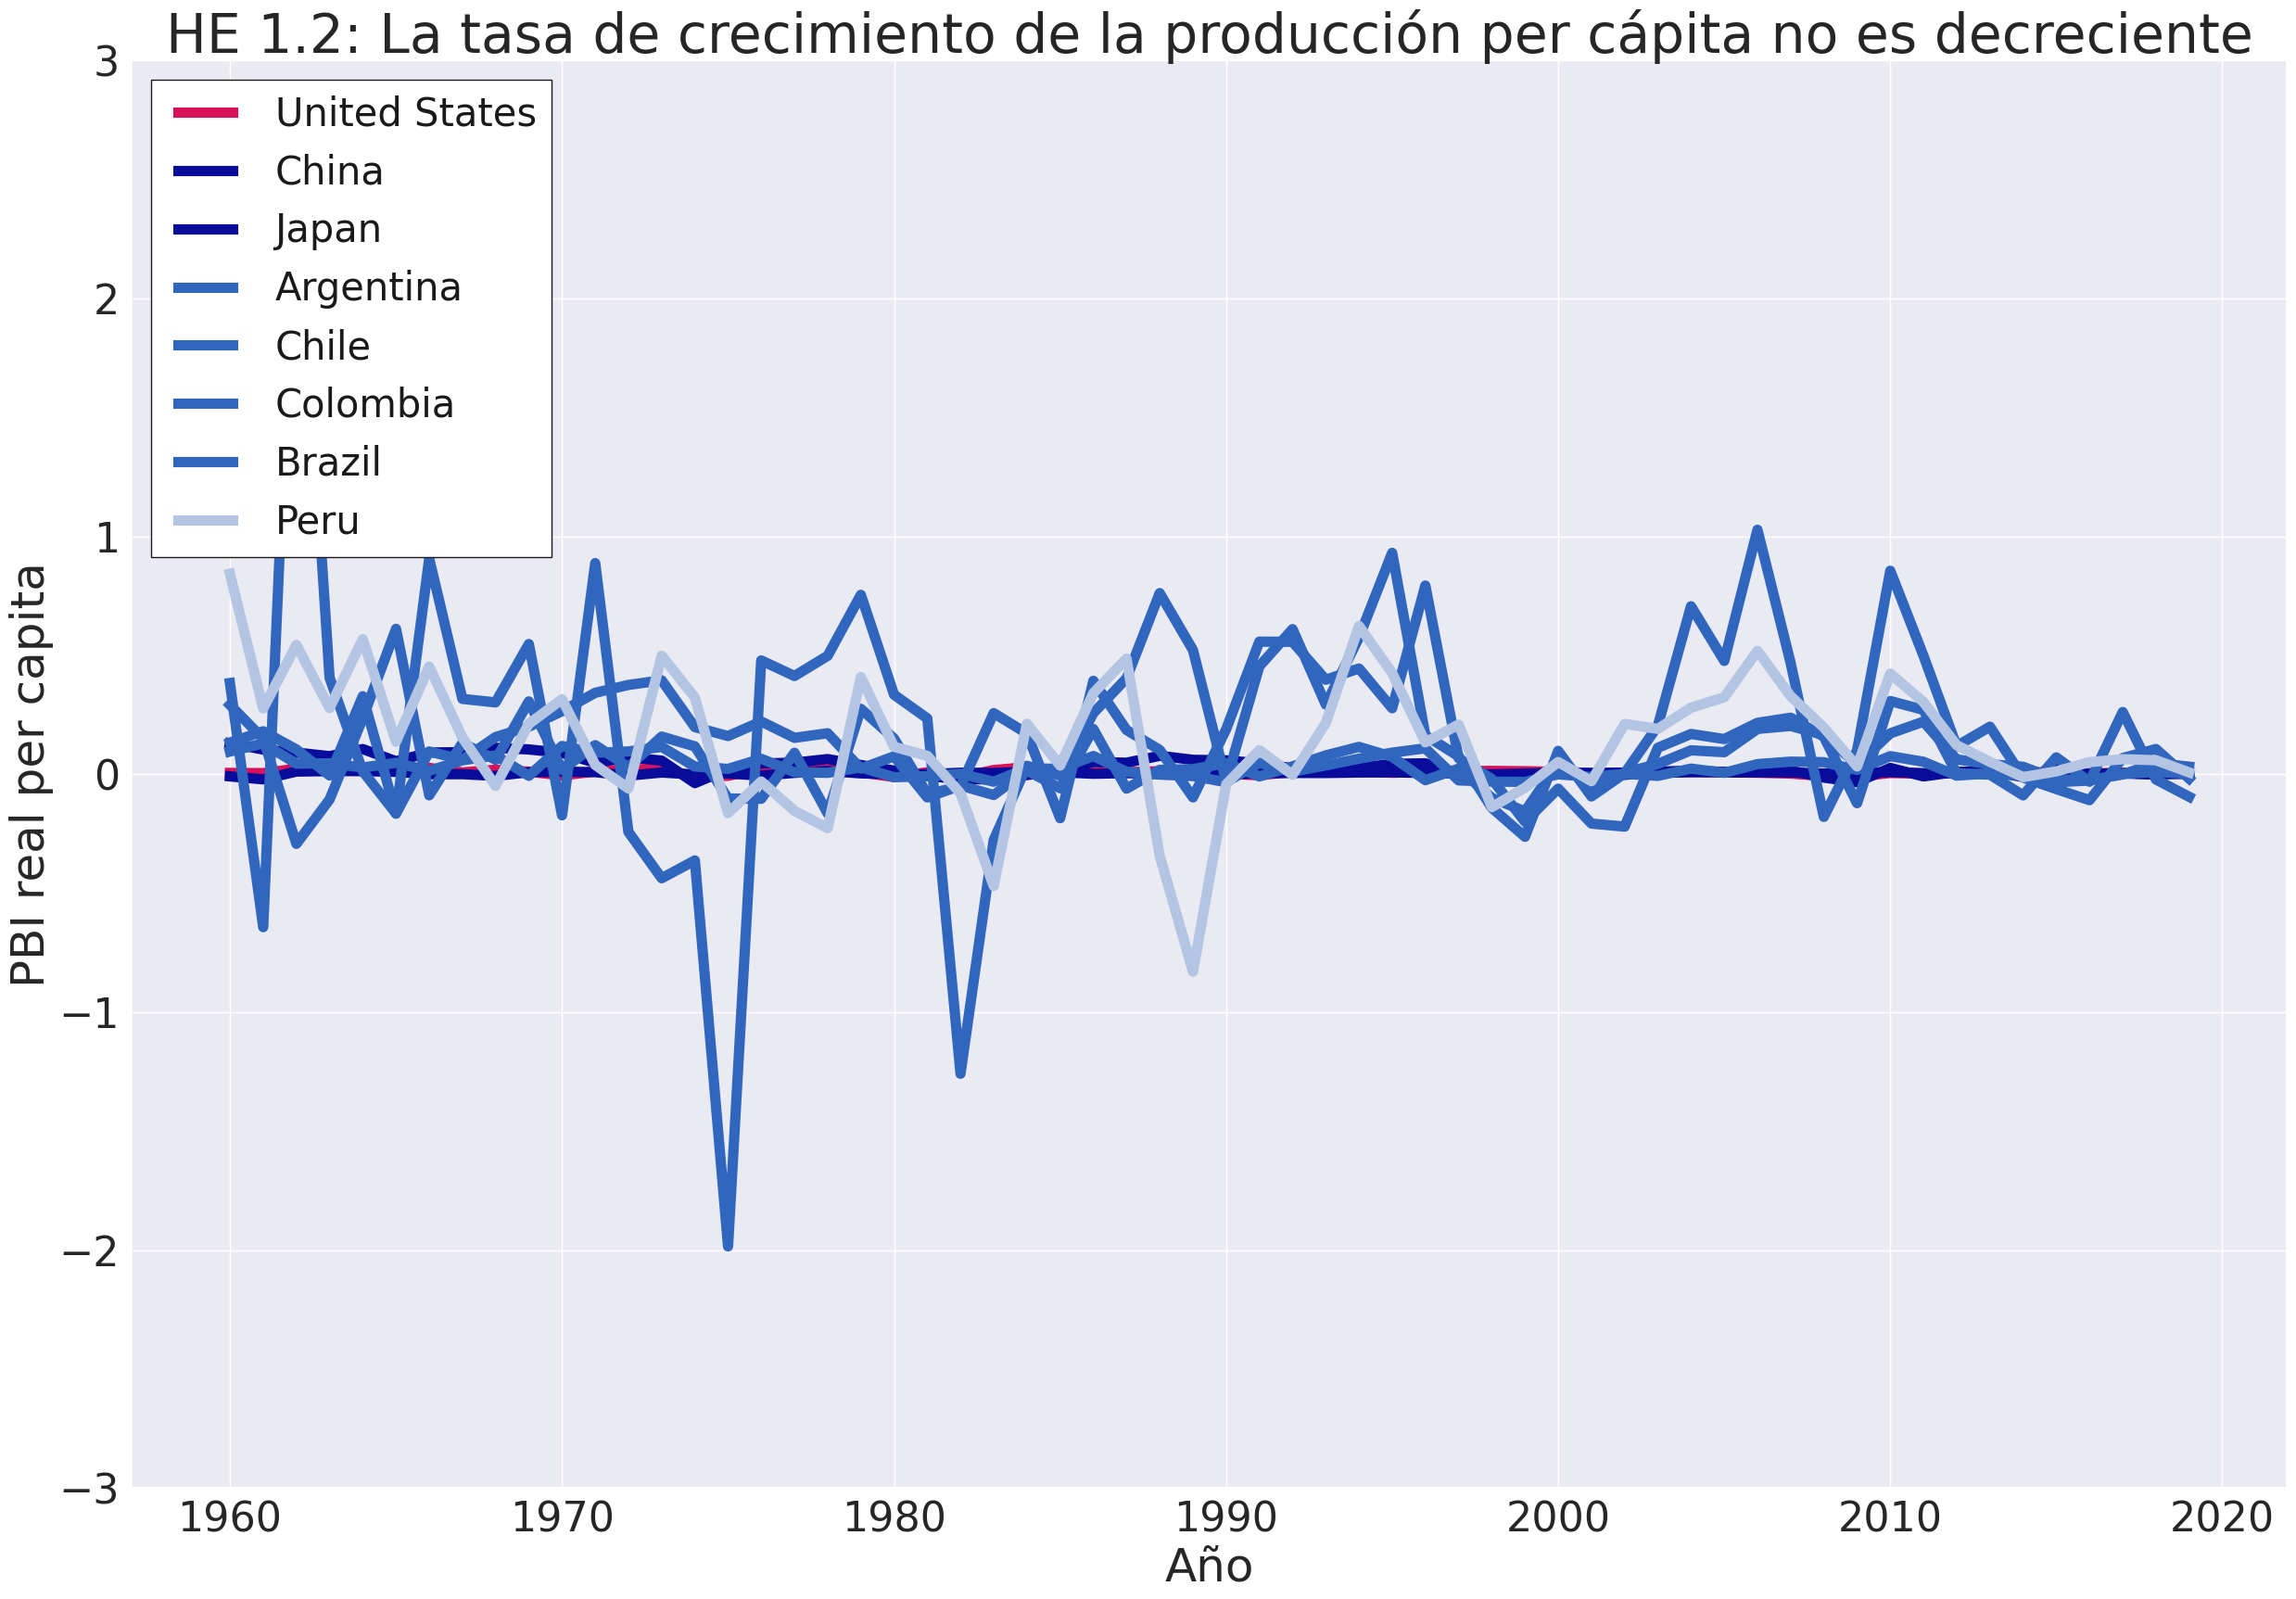

In [61]:
# Establecemos el tamaño de la figura
fig, ax = plt.subplots(figsize=(30,20))

# Etiquetamos los ejes
ax.set_title('HE 1.2: La tasa de crecimiento de la producción per cápita no es decreciente', fontsize = 42)
ax.set_xlabel('Año', fontsize = 36)
ax.set_ylabel('PBI real per capita', fontsize = 36)
ax.tick_params(axis = 'both', which = 'major', labelsize = 32)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)

# Ploteamos
with plt.style.context('classic'):
    plt.plot(df_growth_rate_gdp_pc['United States'], color = "#d81159", linewidth=8)
    plt.plot(df_growth_rate_gdp_pc['China'], color = "#090c9b", linewidth=8)
    plt.plot(df_growth_rate_gdp_pc['Japan'], color = "#090c9b", linewidth=8)
    plt.plot(df_growth_rate_gdp_pc['Argentina'], color = "#3066be", linewidth=8)
    plt.plot(df_growth_rate_gdp_pc['Chile'], color = "#3066be", linewidth=8)
    plt.plot(df_growth_rate_gdp_pc['Colombia'], color = "#3066be", linewidth=8)
    plt.plot(df_growth_rate_gdp_pc['Brazil'], color = "#3066be", linewidth=8)
    plt.plot(df_growth_rate_gdp_pc['Peru'], color="#b4c5e4", linewidth=8)
    # Leyenda
    plt.legend(['United States', 'China', 'Japan', 'Argentina', 'Chile', 'Colombia', 'Brazil', 'Peru'], loc='upper left', fontsize="30")
    plt.savefig(f"{graphs_folder}/{'h1_2.png'}", dpi=300, bbox_inches='tight') # exportamos  en pdf
    plt.show()

##### Log de la producción per cápita.

In [62]:
df_log_gdp_pc = pd.read_csv(f"{tables_folder}/{'log_gdp_pc.csv'}", index_col='year', parse_dates = True)
df_log_gdp_pc.head(5)

,Argentina,Australia,Austria,Belgium,Bolivia (Plurinational State of),Brazil,Burkina Faso,Canada,Chile,China,...,Taiwan,Thailand,Trinidad and Tobago,Turkey,United Kingdom,United States,Uruguay,Venezuela (Bolivarian Republic of),Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
1960-01-01,11.667391,13.914193,13.303440,13.463166,10.593708,11.246239,9.814720,13.870813,12.416509,9.960148,...,11.318525,10.246412,12.942017,12.302385,13.650726,14.206156,12.911629,12.938733,11.481175,11.279362
1961-01-01,11.711645,13.917478,13.377082,13.518803,10.639742,11.377466,9.762877,13.892960,12.339210,9.743530,...,11.397824,10.297739,13.143387,12.287322,13.677760,14.218880,12.913256,12.914128,11.405709,11.315123
1962-01-01,11.619227,13.973480,13.411190,13.585311,10.647928,11.425279,9.863180,13.953624,12.614832,9.847116,...,11.473267,10.315789,13.078538,12.334765,13.686918,14.282650,12.924344,12.927981,11.334327,11.260282
1963-01-01,11.585879,14.063950,13.466167,13.622597,10.706690,11.475722,9.810361,13.996348,12.663810,9.970185,...,11.602094,10.361499,13.239031,12.430834,13.730517,14.323056,12.865575,12.967933,11.378137,11.249320
1964-01-01,11.658243,14.099273,13.526492,13.711716,10.786947,11.508133,9.876347,14.066470,12.665371,10.097984,...,11.752267,10.443523,13.264296,12.459013,13.804630,14.385347,12.911961,13.058956,11.566003,11.165657


<div style="font-family: Times New Roman; text-align: left; color:dark"> Veamos qué ocurre con el log PBI pc. <div/>

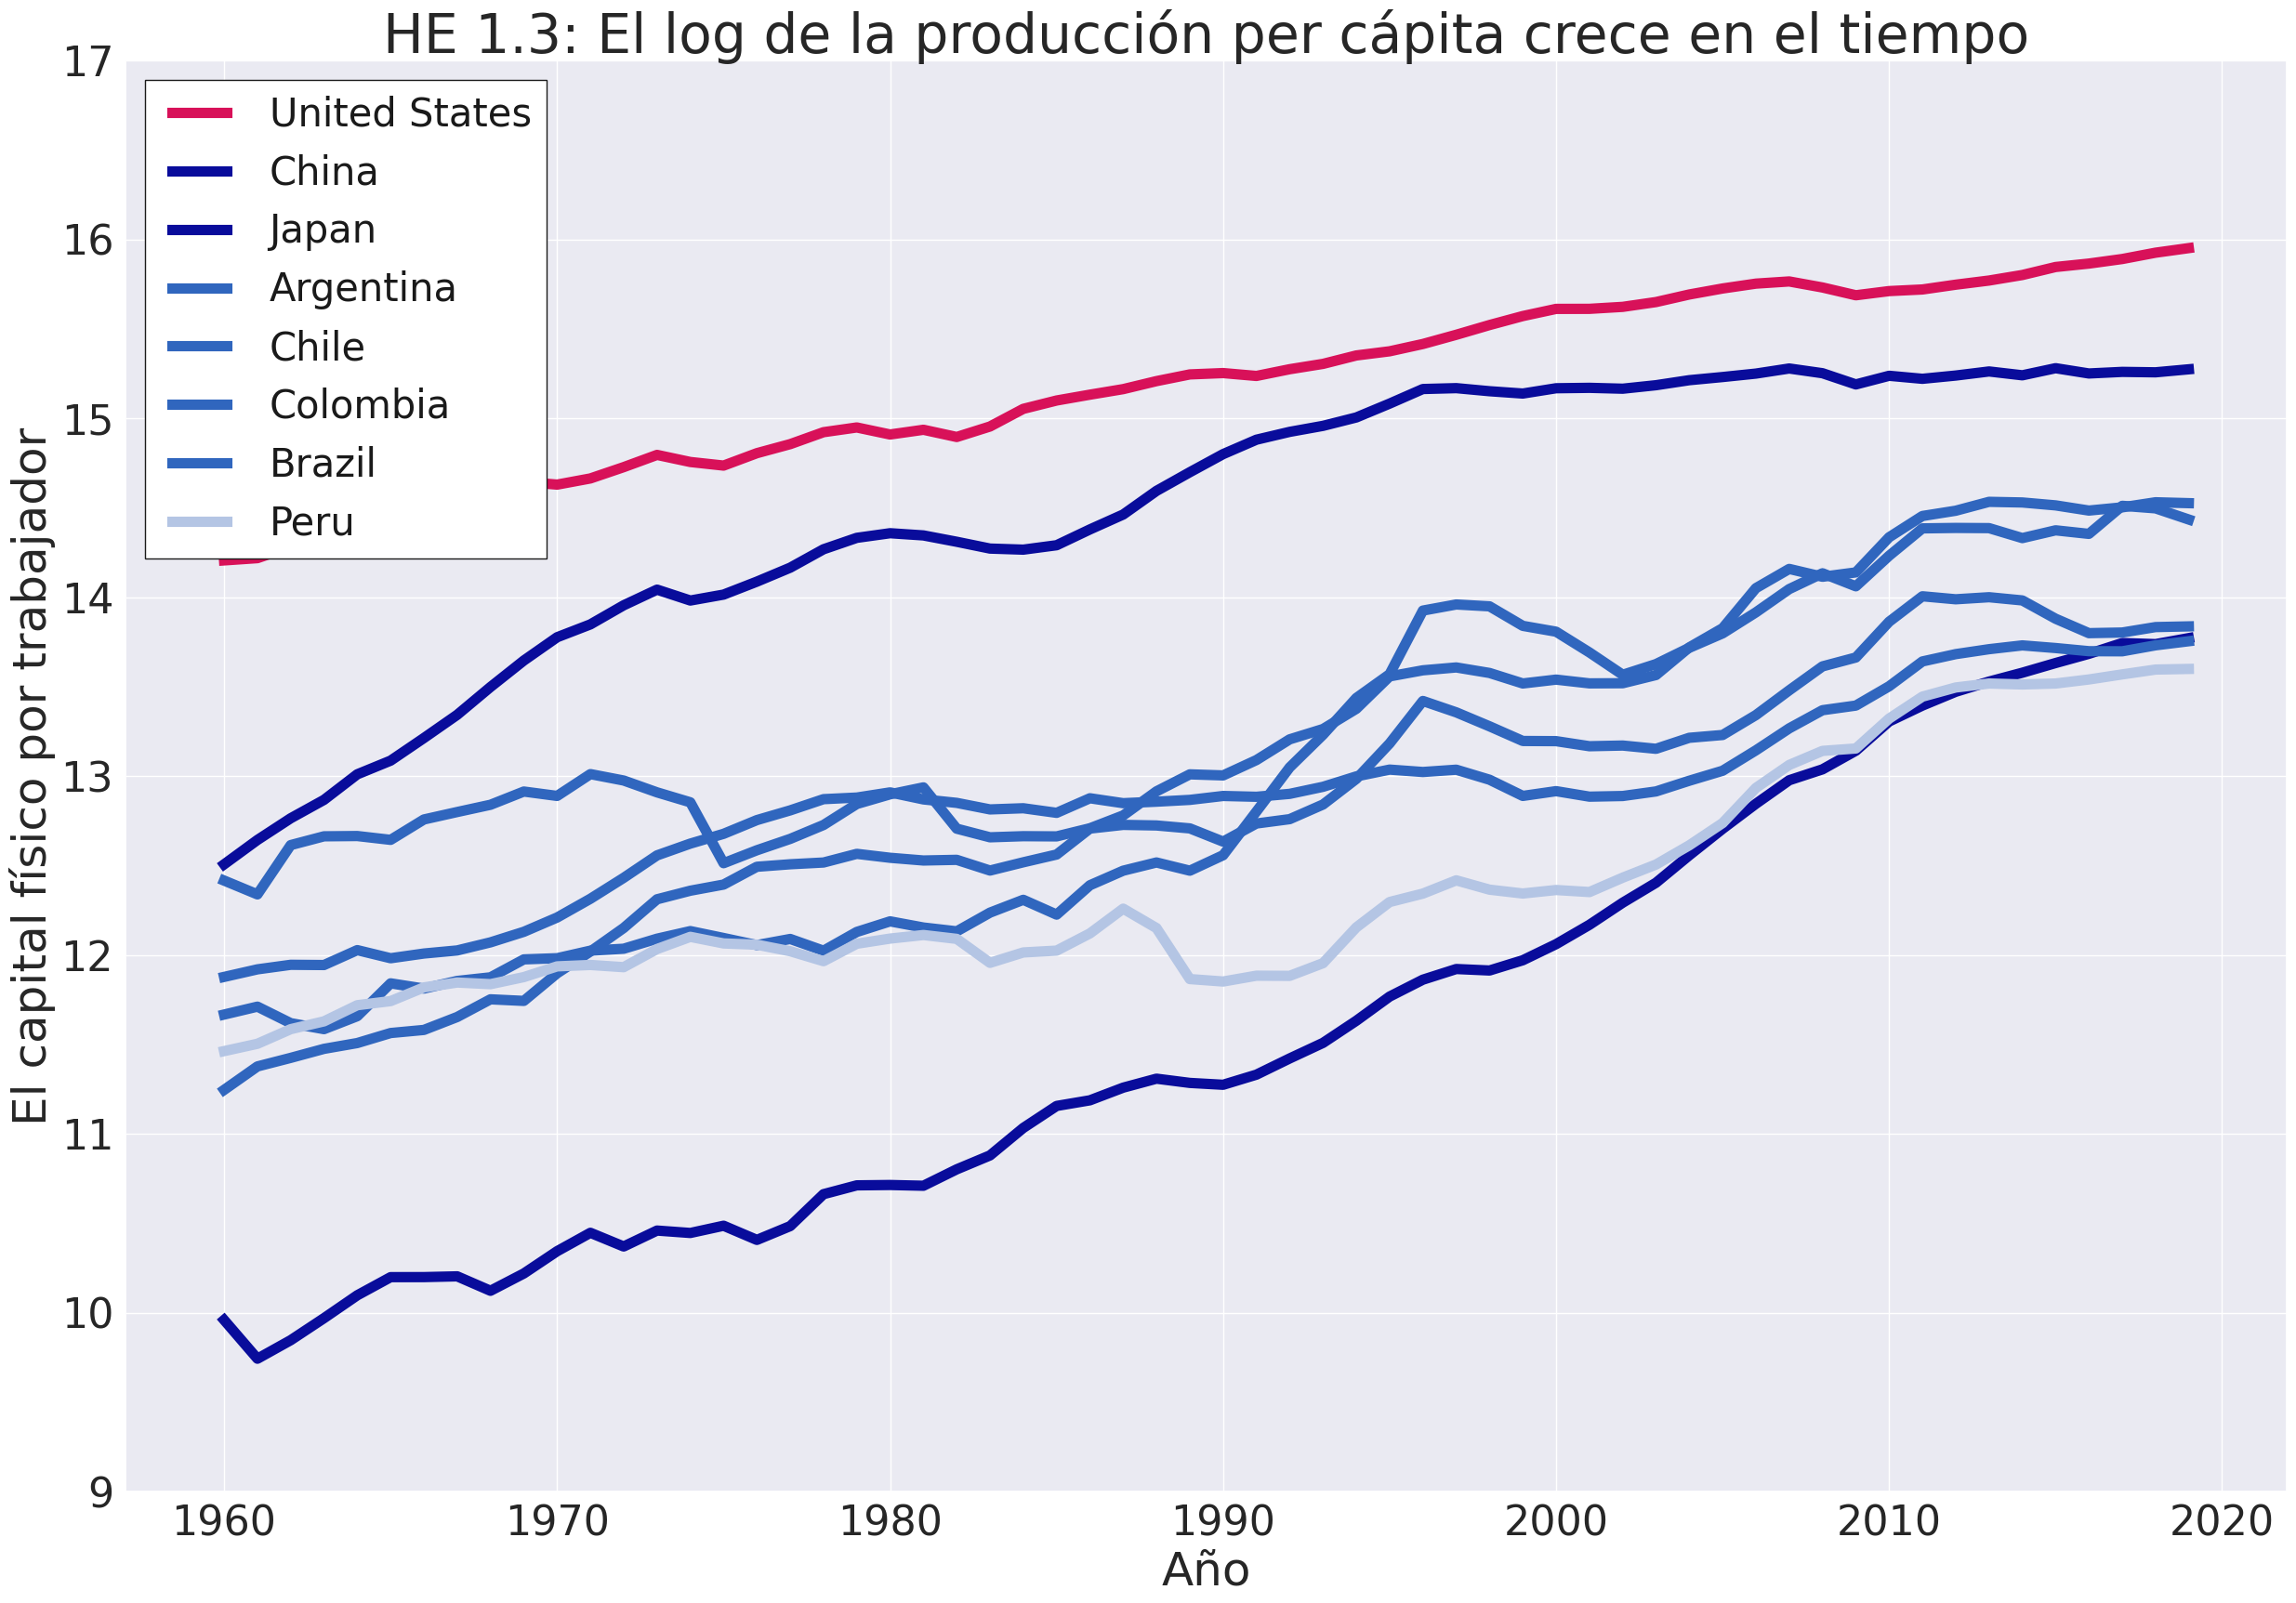

In [63]:
# Establecemos el tamaño de la figura
fig, ax = plt.subplots(figsize=(30,20))

# Etiquetamos los ejes
ax.set_title('HE 1.3: El log de la producción per cápita crece en el tiempo', fontsize = 42)
ax.set_xlabel('Año', fontsize = 36)
ax.set_ylabel('El capital físico por trabajador', fontsize = 36)
ax.tick_params(axis = 'both', which = 'major', labelsize = 32)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)

# Ploteamos
with plt.style.context('classic'):
    plt.plot(df_log_gdp_pc['United States'], color = "#d81159", linewidth=8)
    plt.plot(df_log_gdp_pc['China'], color = "#090c9b", linewidth=8)
    plt.plot(df_log_gdp_pc['Japan'], color = "#090c9b", linewidth=8)
    plt.plot(df_log_gdp_pc['Argentina'], color = "#3066be", linewidth=8)
    plt.plot(df_log_gdp_pc['Chile'], color = "#3066be", linewidth=8)
    plt.plot(df_log_gdp_pc['Colombia'], color = "#3066be", linewidth=8)
    plt.plot(df_log_gdp_pc['Brazil'], color = "#3066be", linewidth=8)
    plt.plot(df_log_gdp_pc['Peru'], color="#b4c5e4", linewidth=8)
    # Leyenda
    plt.legend(['United States', 'China', 'Japan', 'Argentina', 'Chile', 'Colombia', 'Brazil', 'Peru'], loc='upper left', fontsize="30")
    plt.savefig(f"{graphs_folder}/{'h2.png'}", dpi=300, bbox_inches='tight') # exportamos  en pdf
    plt.show()

<div id="he-2">
   <!-- Contenido de la celda de destino -->
</div>

<div style="text-align: left; font-family: 'PT Serif Pro Book'; font-size:22px">
    <span style="font-size: 24px; color: #03256c">&#10123;</span> <span>El capital físico por trabajador crece en el tiempo.
</span>
  </div>

In [64]:
df_capital_pw = pd.read_csv(f"{tables_folder}/{'capital_pw.csv'}", index_col='year', parse_dates = True)
df_capital_pw.head(5)

,Argentina,Australia,Austria,Belgium,Bolivia (Plurinational State of),Brazil,Burkina Faso,Canada,Chile,China,...,Taiwan,Thailand,Trinidad and Tobago,Turkey,United Kingdom,United States,Uruguay,Venezuela (Bolivarian Republic of),Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
1960-01-01,13550.964569,157783.358515,49957.220885,135606.390155,9459.668666,17123.052612,903.124416,125873.245421,34432.236679,2339.580725,...,9635.291803,5795.018138,32796.593598,27366.592702,87708.883207,207081.140516,35382.924685,78454.514510,15035.728096,8190.881404
1961-01-01,14402.657145,161055.065389,52458.292977,139320.352078,9570.318638,17753.846797,914.381766,130376.397318,35760.863626,2449.314255,...,9930.774810,5987.957787,34339.830321,28766.663822,90992.898643,213872.761784,36832.751023,77944.224116,14894.636677,7873.966628
1962-01-01,14971.599474,163116.152222,55037.990134,142208.742635,10109.128072,18387.850892,932.139034,132892.176192,36382.436789,2470.335807,...,10245.312599,6333.693904,35933.738897,30612.590213,93947.010056,218421.842471,38606.984860,77823.973651,14774.274079,7529.057084
1963-01-01,15252.371208,165588.714143,57682.082917,145933.678290,10508.169451,18752.130361,945.501447,136008.310000,37000.351039,2493.822129,...,10702.102143,6813.004571,37023.800958,32227.890765,97634.047792,223626.280824,38874.778211,77624.357641,14498.793462,7200.809245
1964-01-01,15814.159102,168502.332720,60993.448281,150475.550498,10950.333567,19210.775664,959.538980,137990.670627,39344.446004,2526.591476,...,11416.232203,7247.744490,37591.816300,33838.942243,102366.268342,227495.039717,40963.957146,78989.116891,14115.451880,6922.497511


In [ ]:
# Establecemos el tamaño de la figura
fig, ax = plt.subplots(figsize=(30,20))

# Etiquetamos los ejes
ax.set_title('HE 2: El capital físico por trabajador crece en el tiempo', fontsize = 42)
ax.set_xlabel('Año', fontsize = 36)
ax.set_ylabel('El capital físico por trabajador', fontsize = 36)
ax.tick_params(axis = 'both', which = 'major', labelsize = 32)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)

# Ploteamos
with plt.style.context('classic'):
    plt.plot(df_capital_pw['United States'], color = "#d81159", linewidth=8)
    plt.plot(df_capital_pw['China'], color = "#090c9b", linewidth=8)
    plt.plot(df_capital_pw['Japan'], color = "#090c9b", linewidth=8)
    plt.plot(df_capital_pw['Argentina'], color = "#3066be", linewidth=8)
    plt.plot(df_capital_pw['Chile'], color = "#3066be", linewidth=8)
    plt.plot(df_capital_pw['Colombia'], color = "#3066be", linewidth=8)
    plt.plot(df_capital_pw['Brazil'], color = "#3066be", linewidth=8)
    plt.plot(df_capital_pw['Peru'], color="#b4c5e4", linewidth=8)
    # Leyenda
    plt.legend(['United States', 'China', 'Japan', 'Argentina', 'Chile', 'Colombia', 'Brazil', 'Peru'], loc='upper left', fontsize="30")
    plt.savefig(f"{out_dir_2}/{'h2.pdf'}", dpi=300, bbox_inches='tight') # exportamos  en pdf
    plt.show()

<div id="he-3">
   <!-- Contenido de la celda de destino -->
</div>

<div style="text-align: left; font-family: 'PT Serif Pro Book'; font-size:22px">
    <span style="font-size: 24px; color: #03256c">&#10124;</span> <span>La tasa de rentabilidad del capital es aproximadamente constante.
</span>
  </div>

In [ ]:
df_return_capital = pd.read_csv(f"{out_dir_1}/{'return_capital.csv'}", index_col = 'year', parse_dates=True)
df_return_capital.head(5)

In [ ]:
# Establecemos el tamaño de la figura
fig, ax = plt.subplots(figsize=(30,20))

# Etiquetamos los ejes
ax.set_title('HE 3: La tasa de rentabilidad del capital es aproximadamente constante', fontsize = 42)
ax.set_xlabel('Año', fontsize = 36)
ax.set_ylabel('El capital físico por trabajador', fontsize = 36)
ax.tick_params(axis = 'both', which = 'major', labelsize = 32)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)

# Ploteamos
with plt.style.context('classic'):
    plt.plot(df_return_capital['United States'], color = "#d81159", linewidth=8)
    plt.plot(df_return_capital['China'], color = "#090c9b", linewidth=8)
    plt.plot(df_return_capital['Japan'], color = "#090c9b", linewidth=8)
    plt.plot(df_return_capital['Argentina'], color = "#3066be", linewidth=8)
    plt.plot(df_return_capital['Chile'], color = "#3066be", linewidth=8)
    plt.plot(df_return_capital['Colombia'], color = "#3066be", linewidth=8)
    plt.plot(df_return_capital['Brazil'], color = "#3066be", linewidth=8)
    plt.plot(df_return_capital['Peru'], color="#b4c5e4", linewidth=8)
    # Leyenda
    plt.legend(['United States', 'China', 'Japan', 'Argentina', 'Chile', 'Colombia', 'Brazil', 'Peru'], loc='upper left', fontsize="30")
    plt.savefig(f"{out_dir_2}/{'h3.pdf'}", dpi=300, bbox_inches='tight') # exportamos  en pdf
    plt.show()

<div id="he-4">
   <!-- Contenido de la celda de destino -->
</div>

<div style="text-align: left; font-family: 'PT Serif Pro Book'; font-size:22px">
    <span style="font-size: 24px; color: #03256c">&#10125;</span> <span>El ratio capital físico entre producción es aproximadamente constante.

</span>
  </div>

In [ ]:
df_ratio_k_y_pc = pd.read_csv(f"{out_dir_1}/{'ratio_k_y_pc.csv'}", index_col = 'year', parse_dates=True)
df_ratio_k_y_pc.head(5)

In [ ]:
# Establecemos el tamaño de la figura
fig, ax = plt.subplots(figsize=(30,20))

# Etiquetamos los ejes
ax.set_title('HE 4: El ratio capital físico entre producción es aproximadamente constante', fontsize = 42)
ax.set_xlabel('Año', fontsize = 36)
ax.set_ylabel('El capital físico por trabajador', fontsize = 36)
ax.tick_params(axis = 'both', which = 'major', labelsize = 32)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)

# Ploteamos
with plt.style.context('classic'):
    plt.plot(df_ratio_k_y_pc['United States'], color = "#d81159", linewidth=8)
    plt.plot(df_ratio_k_y_pc['China'], color = "#090c9b", linewidth=8)
    plt.plot(df_ratio_k_y_pc['Japan'], color = "#090c9b", linewidth=8)
    plt.plot(df_ratio_k_y_pc['Argentina'], color = "#3066be", linewidth=8)
    plt.plot(df_ratio_k_y_pc['Chile'], color = "#3066be", linewidth=8)
    plt.plot(df_ratio_k_y_pc['Colombia'], color = "#3066be", linewidth=8)
    plt.plot(df_ratio_k_y_pc['Brazil'], color = "#3066be", linewidth=8)
    plt.plot(df_ratio_k_y_pc['Peru'], color="#b4c5e4", linewidth=8)
    # Leyenda
    plt.legend(['United States', 'China', 'Japan', 'Argentina', 'Chile', 'Colombia', 'Brazil', 'Peru'], loc='upper left', fontsize="30")
    plt.savefig(f"{out_dir_2}/{'h4.pdf'}", dpi=300, bbox_inches='tight') # exportamos  en pdf
    plt.show()

<div id="he-5">
   <!-- Contenido de la celda de destino -->
</div>

<div style="text-align: left; font-family: 'PT Serif Pro Book'; font-size:22px">
    <span style="font-size: 24px; color: #03256c">&#10126;</span> <span>Las participaciones del trabajo y capital físico en la renta nacional son aproximadamente constantes.

</span>
  </div>

In [ ]:
df_labor_national_income = pd.read_csv(f"{out_dir_1}/{'labor_national_income.csv'}", index_col = 'year', parse_dates=True)
df_labor_national_income.head(5)

In [ ]:
# Establecemos el tamaño de la figura
fig, ax = plt.subplots(figsize=(30,20))

# Etiquetamos los ejes
ax.set_title('HE 5:  La participación del trabajo en la renta nacional es aproximadamente constante', fontsize = 42)
ax.set_xlabel('Año', fontsize = 36)
ax.set_ylabel('El capital físico por trabajador', fontsize = 36)
ax.tick_params(axis = 'both', which = 'major', labelsize = 32)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)

# Ploteamos
with plt.style.context('classic'):
    plt.plot(df_labor_national_income['United States'], color = "#d81159", linewidth=8)
    plt.plot(df_labor_national_income['China'], color = "#090c9b", linewidth=8)
    plt.plot(df_labor_national_income['Japan'], color = "#090c9b", linewidth=8)
    plt.plot(df_labor_national_income['Argentina'], color = "#3066be", linewidth=8)
    plt.plot(df_labor_national_income['Chile'], color = "#3066be", linewidth=8)
    plt.plot(df_labor_national_income['Colombia'], color = "#3066be", linewidth=8)
    plt.plot(df_labor_national_income['Brazil'], color = "#3066be", linewidth=8)
    plt.plot(df_labor_national_income['Peru'], color="#b4c5e4", linewidth=8)
    # Leyenda
    plt.legend(['United States', 'China', 'Japan', 'Argentina', 'Chile', 'Colombia', 'Brazil', 'Peru'], loc='upper left', fontsize="30")
    plt.savefig(f"{out_dir_2}/{'h5.pdf'}", dpi=300, bbox_inches='tight') # exportamos  en pdf
    plt.show()

<div id="he-3">
   <!-- Contenido de la celda de destino -->
</div>

<div style="text-align: left; font-family: 'PT Serif Pro Book'; font-size:22px">
    <span style="font-size: 24px; color: #03256c">&#10127;</span> <span>La tasa de crecimiento de la producción por trabajador es muy distinta en los distintos países.

</span>
  </div>

In [ ]:
df_gdp_pw = pd.read_csv(f"{out_dir_1}/{'gdp_pw.csv'}", index_col = 'year', parse_dates=True)
df_gdp_pw.head(5)

<div style="font-family: Times New Roman; text-align: left; color:dark"> Tasa de crecimiento de la producción por trabajador. <div/>

In [ ]:
df_growth_rate_gdp_pw = pd.read_csv(f"{out_dir_1}/{'growth_rate_gdp_pw.csv'}", index_col = 'year', parse_dates = True)
df_growth_rate_gdp_pw.head(5)

In [ ]:
# Establecemos el tamaño de la figura
fig, ax = plt.subplots(figsize=(30,20))

# Etiquetamos los ejes
ax.set_title('HE 6:  La tasa de crecimiento de la producción por trabajador es muy distinta en los distintos países', fontsize = 42)
ax.set_xlabel('Año', fontsize = 36)
ax.set_ylabel('El capital físico por trabajador', fontsize = 36)
ax.tick_params(axis = 'both', which = 'major', labelsize = 32)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)

# Ploteamos
with plt.style.context('classic'):
    plt.plot(df_growth_rate_gdp_pw['United States'], color = "#d81159", linewidth=8)
    plt.plot(df_growth_rate_gdp_pw['China'], color = "#090c9b", linewidth=8)
    plt.plot(df_growth_rate_gdp_pw['Japan'], color = "#090c9b", linewidth=8)
    plt.plot(df_growth_rate_gdp_pw['Argentina'], color = "#3066be", linewidth=8)
    plt.plot(df_growth_rate_gdp_pw['Chile'], color = "#3066be", linewidth=8)
    plt.plot(df_growth_rate_gdp_pw['Colombia'], color = "#3066be", linewidth=8)
    plt.plot(df_growth_rate_gdp_pw['Brazil'], color = "#3066be", linewidth=8)
    plt.plot(df_growth_rate_gdp_pw['Peru'], color="#b4c5e4", linewidth=8)
    # Leyenda
    plt.legend(['United States', 'China', 'Japan', 'Argentina', 'Chile', 'Colombia', 'Brazil', 'Peru'], loc='upper left', fontsize="30")
    plt.savefig(f"{out_dir_2}/{'h6.pdf'}", dpi=300, bbox_inches='tight') # exportamos  en pdf
    plt.show()

<div style="text-align: left;">
    <span style="font-size: 24px; color: rgb(255, 32, 78); font-weight: bold;">&#128221;</span>
    <span style="font-family: PT Serif Pro Book; color: black; font-size: 16px;">
        Hasta este punto, hemos abordado el apartado <b>a)</b> del <b>ejercicio 1 "Replicando los Hechos Estilizados del Crecimiento Económico"</b>. De hecho, hemos ido más allá de los requerimientos iniciales al replicar todos los HE. Revise el <i>script</i> <code>he_growth_correlates.m</code> de matlab para realizar las demás tareas, desde <b>b)</b> hasta <b>c)</b>. Dicho <i>script</i> requiere la data <code>pwt_parsed.xlsx</code>
    </span>
</div>

---
---
